In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'object','v2':'sms'},inplace=True)
data.head()

,object,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
data['object']=le.fit_transform(data['object'])
data.head()

,object,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().sum()

object    0
sms       0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data = data.drop_duplicates(keep='first')

In [14]:
data.shape

(5169, 2)

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

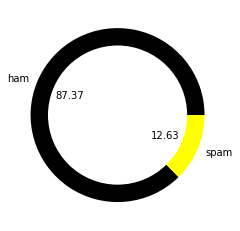

In [15]:
plt.pie(data['object'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['black','yellow'])
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanke_x5itsyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data['num_alphabets']=data['sms'].apply(len)

In [18]:
data['num_words']=data['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
data['num_sentences']=data['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
data.head()

,object,sms,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
data[['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:>

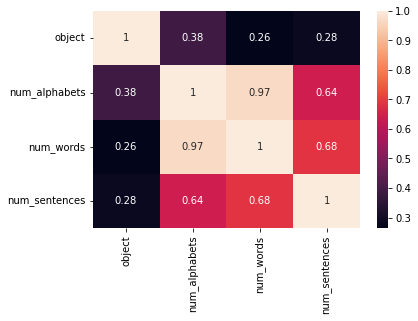

In [22]:
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke_x5itsyv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# lower casing all the sms 
# tokenization of the all the sms which means seperating all the words
def transform_sms(sms):
  sms=sms.lower()
  sms=nltk.word_tokenize(sms)

# removing the special characters
  y=[]
  for i in sms:
    if i.isalnum():
      y.append(i)

  sms=y[:]
  y.clear()

# removing stop words and punctuation
  for i in sms:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  sms=y[:]
  y.clear()

# Stemming -> it is the process of reducing words to their base form or root form(ex- study becomes studi)
  for i in sms:
    y.append(ps.stem(i))

  return ' '.join(y)

In [25]:
data['transformed_sms']=data['sms'].apply(transform_sms)

In [26]:
data.head()

,object,sms,num_alphabets,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [27]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [28]:
spam_wc = wc.generate(data[data['object'] == 1]['transformed_sms'].str.cat(sep=" "))

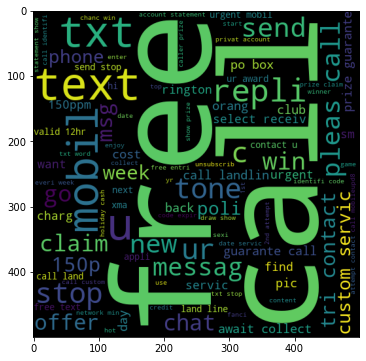

In [29]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [30]:
ham_wc = wc.generate(data[data['object'] == 0]['transformed_sms'].str.cat(sep=" "))

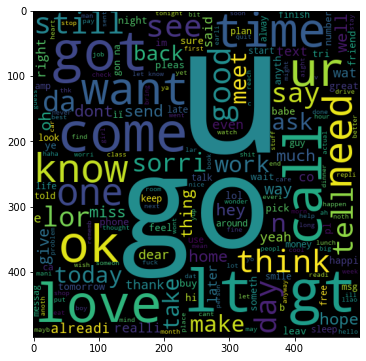

In [31]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## Model Building

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [33]:
X=tfidf.fit_transform(data['transformed_sms']).toarray()
X.shape

(5169, 6708)

In [34]:
y=data['object'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=0)

In [37]:
from sklearn.metrics import accuracy_score,precision_score , classification_report

In [38]:
from sklearn.svm import SVC

In [39]:
model = SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9383807681680022
0.9918032786885246


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      3156
           1       0.99      0.52      0.68       463

    accuracy                           0.94      3619
   macro avg       0.96      0.76      0.83      3619
weighted avg       0.94      0.94      0.93      3619



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred)) 

0.9331306990881459
0.7575757575757576


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3156
           1       0.76      0.70      0.73       463

    accuracy                           0.93      3619
   macro avg       0.86      0.83      0.85      3619
weighted avg       0.93      0.93      0.93      3619



In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8789720917380491
1.0


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3156
           1       1.00      0.05      0.10       463

    accuracy                           0.88      3619
   macro avg       0.94      0.53      0.52      3619
weighted avg       0.89      0.88      0.83      3619



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [52]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9505388228792484
0.9965034965034965


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3156
           1       1.00      0.62      0.76       463

    accuracy                           0.95      3619
   macro avg       0.97      0.81      0.87      3619
weighted avg       0.95      0.95      0.95      3619



In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model4 = LogisticRegression()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9060513954130975
0.9767441860465116


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3156
           1       0.98      0.27      0.43       463

    accuracy                           0.91      3619
   macro avg       0.94      0.64      0.69      3619
weighted avg       0.91      0.91      0.88      3619



#### SVC - > accuracy - 93% , precision - 99%
#### DT    - > accuracy - 93% , precision - 99%
#### KN    - > accuracy - 87% , precision - 100%
#### RF    - > accuracy - 95% , precision - 99%
#### LR    - > accuracy - 90% , precision - 97%
              